<a href="https://colab.research.google.com/github/hrd1409/python-ml-projects/blob/master/GoldPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Dataset loading

In [2]:
data=pd.read_csv("/content/gld_price_data.csv")

Dataset Processing/

In [3]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
data.shape

(2290, 6)

In [7]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Correlation:-A correlation is the statistical summary of the relationship between two sets of variables.


Positive Correlation
Negative Correlation

In [31]:
correlation = data.corr()

<ipython-input-31-d9a448acd2ec>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<Axes: >

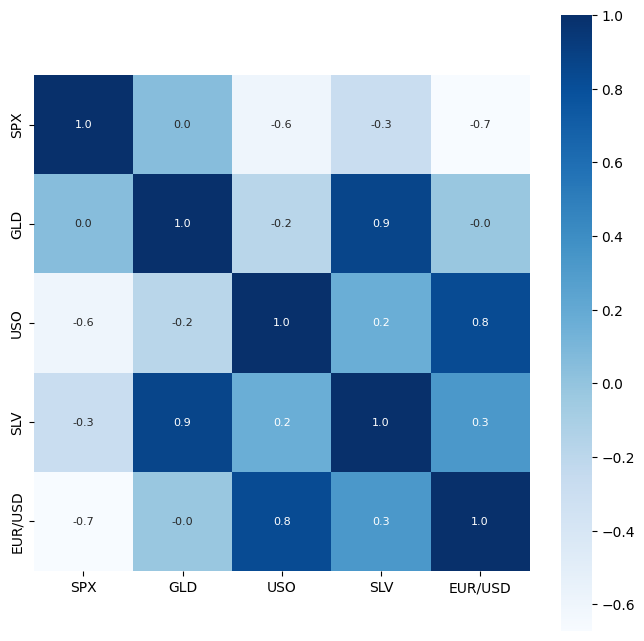

In [9]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [10]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-12-954563e299eb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

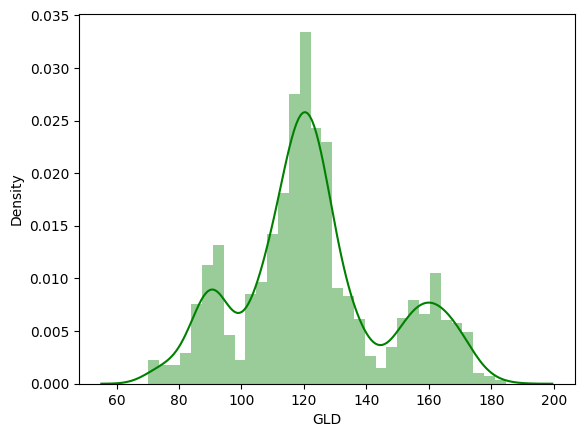

In [12]:
sns.distplot(data['GLD'],color='green')

Splitting of Data

In [14]:
X = data.drop(['Date','GLD'],axis=1)
Y = data['GLD']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [17]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [18]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Regression Model -RandomForestRegressor

In [19]:
regressor = RandomForestRegressor(n_estimators=100)

In [20]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [22]:
# prediction on Test Data
test_data_prediction = regressor.predict(x_test)

In [23]:
print(test_data_prediction)

[120.89570049 108.68959874 153.02710071 118.72949992 126.25200113
 154.1023001  127.1235012  126.02920029 135.21699921  97.18799797
 112.22330062 145.45490269 124.61470069 118.45259966 120.40530011
 160.89779973 103.96099886  85.32699988 124.94050003 126.49719887
 117.57119943 154.97149972 155.15450228 113.48269931 119.67740045
 109.39539937 126.6949016  123.44350018 124.17469947 107.55149872
 160.0141997  127.25819786 128.10810114 139.2185009   84.46440059
  93.73880113 117.81560099 113.56859956 123.34989977  83.56739912
  89.50340067 147.30470052  90.98140032 112.5648019  139.3406985
 153.99270152 164.74379904 161.90970097 114.51099954 174.23689733
 120.01120041 153.97750088 113.76470085 118.06520049  89.60899981
 154.52420212 119.43710012 130.36549992  92.70609974 125.43730098
 118.02180007 118.28289968 105.01359914  87.11429861 125.31009889
 123.95879989 127.21979858 105.19459931 119.38890044 117.62260112
  92.7608003  108.08289957 147.12970165 130.96090231 149.53180052
 141.415798

In [25]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9894243055825616


In [29]:
y_test = list(y_test)

Visualizing the output

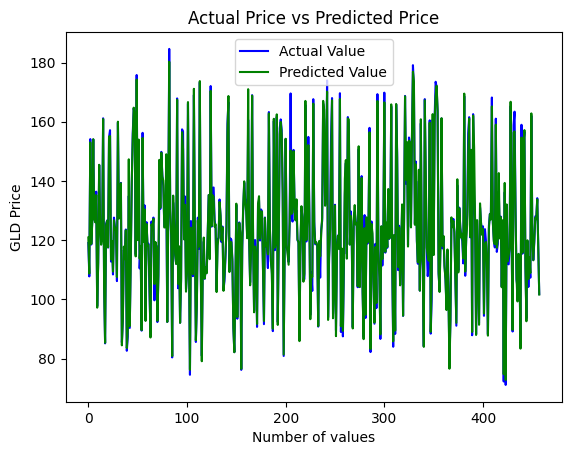

In [30]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()